## Assignment 2, Question 1
### Problem statement: To predict housing prices using regularised Gradient Descent Algorithm
#### Submitted by Bhanu Bhandari, IEC2016027

In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [153]:
df = pd.read_csv('/Users/bhanubhandari/Downloads/Housing.csv', index_col='Unnamed: 0')
df.head()

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
1,42000.0,5850,3,1,2,yes,no,yes,no,no,1,no
2,38500.0,4000,2,1,1,yes,no,no,no,no,0,no
3,49500.0,3060,3,1,1,yes,no,no,no,no,0,no
4,60500.0,6650,3,1,2,yes,yes,no,no,no,0,no
5,61000.0,6360,2,1,1,yes,no,no,no,no,0,no


Since the data above contains both numerical and categorical data, we drop the categorical data in order to obtain all the numerical values we need to input into the gradient descent algorithm. 

In [154]:
x = df[['lotsize','bedrooms','bathrms', 'stories', 'garagepl']].values
y = df['price'].values

We now add the bias term to the equation in order to obtain a linear hypothesis. Our hypothesis under testing is: 
$$ h(X) = w_0 + w_1x_1 + w_2x_2 + w_3x_3 + w_4x_4 + w_5x_5 $$ 
In matrix form, 
$$ h(X) = W^{T}X $$
This accommodates all the features we have considered above. 

In [155]:
print(x.shape, y.shape)
lambda1 = 20

(546, 5) (546,)


We now consider the normal method of solving the equation and obtain the value of the weights matrix as: 
$$ W = ((X^{T}X) + \lambda*I)^{-1}X^{T}Y $$

We introduce normalisation here, because without it linear regression does not return satisfactory results. 

In [156]:
x = (x1-np.min(x1,axis=0))/(np.max(x1,axis=0)-np.min(x1,axis=0))
y = (y1-np.min(y1,axis=0))/(np.max(y1,axis=0)-np.min(y1,axis=0))
w = np.dot(np.linalg.inv(np.dot(x.T,x) + lambda1*np.identity(x.shape[1])),np.dot(x.T,y))

We now obtain the predicted values on the entire dataset as follows. 
We use $$ h = w^Tx $$

In [157]:
h = np.dot(x,w)
h.shape

(546,)

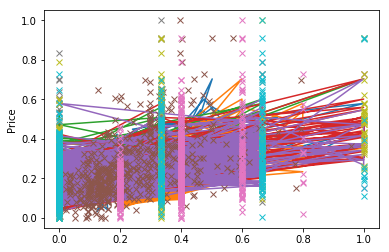

In [158]:
plt.plot(x,h,x,y,'x')
plt.ylabel("Price")
plt.show()

We now calculate the cost function. 

In [159]:
J = (1/2*m)*np.sum(np.square(h-y))
print(J)

1394.932962314688


Thus, with the normal equation method, we get a minimum cost function value of 1394.93 when we normalise the weights. 
We now try the above analysis with different values of $$\lambda$$.

In [161]:
print(x.shape, y.shape)
lambda1 = 0
w = np.dot(np.linalg.inv(np.dot(x.T,x) + lambda1*np.identity(x.shape[1])),np.dot(x.T,y))
h = np.dot(x,w)
h.shape
J = (1/2*m)*np.sum(np.square(h-y))
print(J)

(546, 5) (546,)
1215.4850981788297


In [163]:
print(x.shape, y.shape)
lambda1 = 200
w = np.dot(np.linalg.inv(np.dot(x.T,x) + lambda1*np.identity(x.shape[1])),np.dot(x.T,y))
h = np.dot(x,w)
h.shape
J = (1/2*m)*np.sum(np.square(h-y))
print(J)

(546, 5) (546,)
3283.9758161947757


In [164]:
print(x.shape, y.shape)
lambda1 = 500
w = np.dot(np.linalg.inv(np.dot(x.T,x) + lambda1*np.identity(x.shape[1])),np.dot(x.T,y))
h = np.dot(x,w)
h.shape
J = (1/2*m)*np.sum(np.square(h-y))
print(J)

(546, 5) (546,)
5403.34584211495


In [165]:
print(x.shape, y.shape)
lambda1 = 7000
w = np.dot(np.linalg.inv(np.dot(x.T,x) + lambda1*np.identity(x.shape[1])),np.dot(x.T,y))
h = np.dot(x,w)
h.shape
J = (1/2*m)*np.sum(np.square(h-y))
print(J)

(546, 5) (546,)
9324.013716629552


# Linear Regression using Gradient Descent with Normalisation

In [166]:
df.head()
x1 = df[['lotsize','bedrooms','bathrms', 'stories', 'garagepl']].values
y1 = df['price'].values

In [167]:
# Normalizing x and y
x = (x1-np.min(x1,axis=0))/(np.max(x1,axis=0)-np.min(x1,axis=0))
y = (y1-np.min(y,axis=0))/(np.max(y1,axis=0)-np.min(y1,axis=0))

In [168]:
x

array([[0.28865979, 0.4       , 0.        , 0.33333333, 0.33333333],
       [0.16151203, 0.2       , 0.        , 0.        , 0.        ],
       [0.09690722, 0.4       , 0.        , 0.        , 0.        ],
       ...,
       [0.29896907, 0.4       , 0.33333333, 1.        , 0.33333333],
       [0.29896907, 0.4       , 0.33333333, 0.33333333, 0.33333333],
       [0.29896907, 0.4       , 0.        , 0.33333333, 0.33333333]])

In [169]:
print("x.shape: " + str(x.shape))
print("y.shape: " + str(y.shape))
m = x.shape[0]
n = x.shape[1]
print("m: " + str(m))
print("n: " + str(n))

t = np.ones((m,1))
x = np.hstack((t,x))
print("x.shape after appending a column for bias: " + str(x.shape))

x.shape: (546, 5)
y.shape: (546,)
m: 546
n: 5
x.shape after appending a column for bias: (546, 6)


We now start the analysis for a number of different values of the learning rate and the regulariser. 
The values of *$$\alpha$$ as well as $$ \lambda$$* have been experimented upon, and the results of these experiments are listed in the conclusion. 

In [170]:
w = np.random.rand(1,n+1)
y = np.array(y)
y = np.reshape(y,(y.shape[0],1))
print("x.shape: " + str(x.shape))
print("w.shape: " + str(w.shape))
print("y.shape: " + str(y.shape))

alpha = 0.003 # Learning rate
temp = np.zeros((n+1,1))

iterations = 0
t = 10000
lambda1 = 200
log = np.array([])
while(iterations<t):
    h = np.dot(x,w.T)
    for i in range(n+1):
        temp[i] = w[:,i]*(1 - alpha*lambda1/m) - alpha*(1/m)*(np.sum((h-y)*x[:,i:i+1], axis=0))
    for i in range(n+1):
        w[:,i] = temp[i]
    J = (1/2*m)*np.sum(np.square(h-y))
    log = np.append(log, J)
    iterations+=1

x.shape: (546, 6)
w.shape: (1, 6)
y.shape: (546, 1)


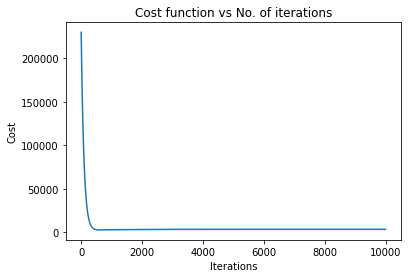

3627.4070784241153


In [171]:
it = np.arange(t)
plt.plot(it, log)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost function vs No. of iterations')
plt.show()
print(log[np.max(it)])

In [172]:
alpha = 0.1 # Learning rate
temp = np.zeros((n+1,1))

iterations = 0
t = 10000
lambda1 = 200
log = np.array([])
while(iterations<t):
    h = np.dot(x,w.T)
    for i in range(n+1):
        temp[i] = w[:,i]*(1 - alpha*lambda1/m) - alpha*(1/m)*(np.sum( (h-y)*x[:,i:i+1], axis=0))
    for i in range(n+1):
        w[:,i] = temp[i]
    J = (1/2*m)*np.sum(np.square(h-y))
    log = np.append(log, J)
    iterations+=1

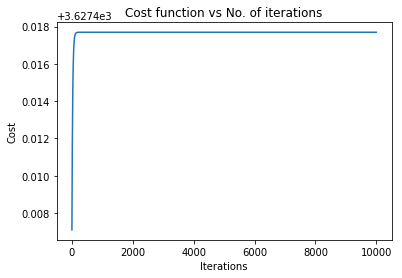

3627.4176936297495


In [173]:
it = np.arange(t)
plt.plot(it, log)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost function vs No. of iterations')
plt.show()
print(log[np.max(it)])

In [174]:
w = np.random.rand(1,n+1)
y = np.array(y)
y = np.reshape(y,(y.shape[0],1))
print("x.shape: " + str(x.shape))
print("w.shape: " + str(w.shape))
print("y.shape: " + str(y.shape))

alpha = 0.01 # Learning rate
temp = np.zeros((n+1,1))

iterations = 0
t = 1000
lambda1 = 2000
log = np.array([])
while(iterations<t):
    h = np.dot(x,w.T)
    for i in range(n+1):
        temp[i] = w[:,i]*(1 - alpha*lambda1/m) - alpha*(1/m)*(np.sum( (h-y)*x[:,i:i+1], axis=0))
    for i in range(n+1):
        w[:,i] = temp[i]
    J = (1/2*m)*np.sum(np.square(h-y))
    log = np.append(log, J)
    iterations+=1

x.shape: (546, 6)
w.shape: (1, 6)
y.shape: (546, 1)


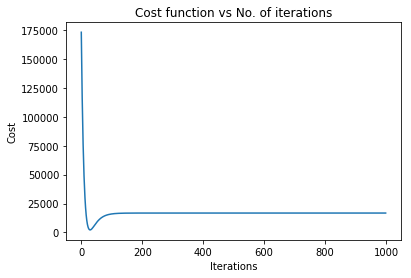

16747.47494594968


In [175]:
it = np.arange(t)
plt.plot(it, log)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost function vs No. of iterations')
plt.show()
print(log[np.max(it)])

In [176]:
w = np.random.rand(1,n+1)
y = np.array(y)
y = np.reshape(y,(y.shape[0],1))
print("x.shape: " + str(x.shape))
print("w.shape: " + str(w.shape))
print("y.shape: " + str(y.shape))

alpha = 0.05 # Learning rate
temp = np.zeros((n+1,1))

iterations = 0
t = 10000
lambda1 = 2000
log = np.array([])
while(iterations<t):
    h = np.dot(x,w.T)
    for i in range(n+1):
        temp[i] = w[:,i]*(1 - alpha*lambda1/m) - alpha*(1/m)*(np.sum( (h-y)*x[:,i:i+1], axis=0))
    for i in range(n+1):
        w[:,i] = temp[i]
    J = (1/2*m)*np.sum(np.square(h-y))
    log = np.append(log, J)
    iterations+=1

x.shape: (546, 6)
w.shape: (1, 6)
y.shape: (546, 1)


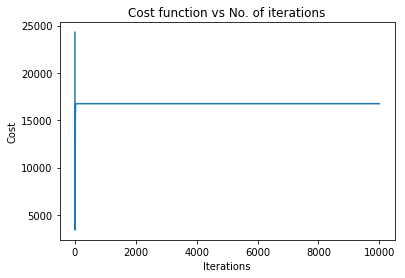

3421.166097588975


In [177]:
it = np.arange(t)
plt.plot(it, log)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost function vs No. of iterations')
plt.show()
w
print(np.min(log))

In [178]:
w = np.random.rand(1,n+1)
y = np.array(y)
y = np.reshape(y,(y.shape[0],1))
print("x.shape: " + str(x.shape))
print("w.shape: " + str(w.shape))
print("y.shape: " + str(y.shape))

alpha = 0.0005 # Learning rate
temp = np.zeros((n+1,1))

iterations = 0
t = 10000
lambda1 = 200
log = np.array([])
while(iterations<t):
    h = np.dot(x,w.T)
    for i in range(n+1):
        temp[i] = w[:,i]*(1 - alpha*lambda1/m) - alpha*(1/m)*(np.sum( (h-y)*x[:,i:i+1], axis=0))
    for i in range(n+1):
        w[:,i] = temp[i]
    J = (1/2*m)*np.sum(np.square(h-y))
    log = np.append(log, J)
    iterations+=1

x.shape: (546, 6)
w.shape: (1, 6)
y.shape: (546, 1)


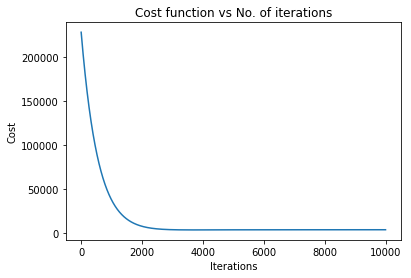

3260.899575146965


array([[0.19839601, 0.04944572, 0.1445705 , 0.14000777, 0.05246272,
        0.1462565 ]])

In [179]:
it = np.arange(t)
plt.plot(it, log)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost function vs No. of iterations')
plt.show()
print(np.min(log))
w

### Reasonably small value of alpha and reasonably large value of lambda


In [180]:
w = np.random.rand(1,n+1)
y = np.array(y)
y = np.reshape(y,(y.shape[0],1))
print("x.shape: " + str(x.shape))
print("w.shape: " + str(w.shape))
print("y.shape: " + str(y.shape))

alpha = 0.005 # Learning rate
temp = np.zeros((n+1,1))

iterations = 0
t = 10000
lambda1 = 500
log = np.array([])
while(iterations<t):
    h = np.dot(x,w.T)
    for i in range(n+1):
        temp[i] = w[:,i]*(1 - alpha*lambda1/m) - alpha*(1/m)*(np.sum( (h-y)*x[:,i:i+1], axis=0))
    for i in range(n+1):
        w[:,i] = temp[i]
    J = (1/2*m)*np.sum(np.square(h-y))
    log = np.append(log, J)
    iterations+=1

x.shape: (546, 6)
w.shape: (1, 6)
y.shape: (546, 1)


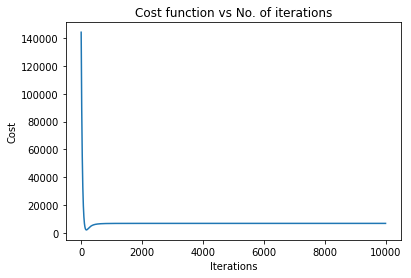

6829.269122671433


array([[0.17684098, 0.05377831, 0.07526577, 0.02863748, 0.06118657,
        0.05353565]])

In [181]:
it = np.arange(t)
plt.plot(it, log)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost function vs No. of iterations')
plt.show()
print(log[np.max(it)])
w

In [182]:
w = np.random.rand(1,n+1)
y = np.array(y)
y = np.reshape(y,(y.shape[0],1))
print("x.shape: " + str(x.shape))
print("w.shape: " + str(w.shape))
print("y.shape: " + str(y.shape))

alpha = 0.003 # Learning rate
temp = np.zeros((n+1,1))

iterations = 0
t = 10000
lambda1 = 3500
log = np.array([])
while(iterations<t):
    h = np.dot(x,w.T)
    for i in range(n+1):
        temp[i] = w[:,i]*(1 - alpha*lambda1/m) - alpha*(1/m)*(np.sum( (h-y)*x[:,i:i+1], axis=0))
    for i in range(n+1):
        w[:,i] = temp[i]
    J = (1/2*m)*np.sum(np.square(h-y))
    log = np.append(log, J)
    iterations+=1

x.shape: (546, 6)
w.shape: (1, 6)
y.shape: (546, 1)


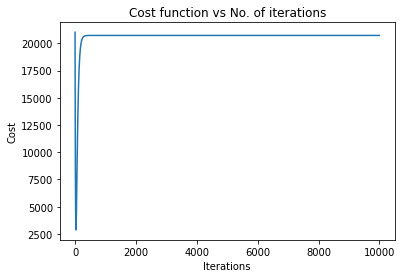

20734.133329919077


array([[0.05290536, 0.01462783, 0.02200392, 0.00708347, 0.01700027,
        0.01471961]])

In [183]:
it = np.arange(t)
plt.plot(it, log)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost function vs No. of iterations')
plt.show()
print(log[np.max(it)])
w

### For extremely large value of lambda and extremely small value of alpha 

In [184]:
w = np.random.rand(1,n+1)
y = np.array(y)
y = np.reshape(y,(y.shape[0],1))
print("x.shape: " + str(x.shape))
print("w.shape: " + str(w.shape))
print("y.shape: " + str(y.shape))

alpha = 0.00001 # Learning rate
temp = np.zeros((n+1,1))

iterations = 0
t = 20000
lambda1 = 40000
log = np.array([])
while(iterations<t):
    h = np.dot(x,w.T)
    for i in range(n+1):
        temp[i] = w[:,i]*(1 - alpha*lambda1/m) - alpha*(1/m)*(np.sum( (h-y)*x[:,i:i+1], axis=0))
    for i in range(n+1):
        w[:,i] = temp[i]
    J = (1/2*m)*np.sum(np.square(h-y))
    log = np.append(log, J)
    iterations+=1

x.shape: (546, 6)
w.shape: (1, 6)
y.shape: (546, 1)


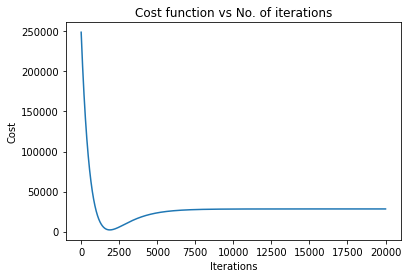

28333.99474361018


array([[0.00553078, 0.00150571, 0.00229192, 0.00071652, 0.00175527,
        0.00151687]])

In [185]:
it = np.arange(t)
plt.plot(it, log)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost function vs No. of iterations')
plt.show()
print(log[np.max(it)])
w

## Conclusions 
We can hence say that only for particular values of the learning rate and the regulariser do we get good enough prediction values (minimised values of the cost function). The earlier assignment had us calculate cost function only on the basis of the learning rate. The performance with regulariser is better than without the regulariser but only until a certain value of regulariser - after that it performs equivalent to, or even worse than batch gradient descent.

The values are still not comparable to the normal equation method, but in certain cases the cost function value for gradient descent with regularisation drops even below the normal equation method by around 10%.  

### We now test the above method with a training and testing split of 70:30. 

In [218]:
x2 = df[['lotsize','bedrooms','bathrms', 'stories', 'garagepl']].values
y2 = df['price'].values

In [220]:
x2_train = x2[0:int(0.7*len(x2))]
y2_train = y2[0:int(0.7*len(y2))]
x2_test = x2[int(0.7*len(x2)):len(x2)]
y2_test = y2[int(0.7*len(y2)):len(y2)]
print(x2_test.shape, x2_train.shape, y2_test.shape, y2_train.shape)

x2_train = (x2_train-np.min(x2_train,axis=0))/(np.max(x2_train,axis=0)-np.min(x2_train,axis=0))
y2_train = (y2_train-np.min(y2_train,axis=0))/(np.max(y2_train,axis=0)-np.min(y2_train,axis=0))
x2_test = (x2_test-np.min(x2_test,axis=0))/(np.max(x2_test,axis=0)-np.min(x2_test,axis=0))
y2_test = (y2_test-np.min(y2_test,axis=0))/(np.max(y2_test,axis=0)-np.min(y2_test,axis=0))

(164, 5) (382, 5) (164,) (382,)


Thus, we have obtained a perfect 70:30 train-test split for the above given data. We now perform the steps above for gradient descent (since the notion of a training and testing split does not hold good for normal equation method). We start the analysis assuming certain values of $$\alpha$$ (the learning rate)  $$\lambda$$ (the value of the regulariser). 


In [221]:
t_train = np.ones((x2_train.shape[0],1))
x2_train = np.hstack((t_train,x2_train))
print(x2_train.shape)

t_test = np.ones((x2_test.shape[0],1))
x2_test = np.hstack((t_test,x2_test))
print(x2_test.shape)

y2_train = np.array(y2_train)
y2_train = np.reshape(y2_train,(y2_train.shape[0],1))

y2_test = np.array(y2_test)
y2_test = np.reshape(y2_test,(y2_test.shape[0],1))

(382, 6)
(164, 6)


In [222]:
alpha = 0.001 # Learning rate
temp = np.zeros((x2_train.shape[1],1))
print(temp.shape)
w1 = np.random.rand(1,x2_train.shape[1])
iterations = 0
t = 20000
lambda1 = 40000
log = np.array([])
J = 0
while(iterations<t):
    h1 = np.dot(x2_train,w1.T)
    for i in range(x2_train.shape[1]):
        temp[i] = w1[:,i]*(1 - alpha*lambda1/m) - alpha*(1/m)*(np.sum((h1-y2_train)*x2_train[:,i:i+1], axis=0))
    for i in range(x2_train.shape[1]):
        w1[:,i] = temp[i]    
    J = (1/2*m)*np.sum(np.square(h1-y2_train))
    log = np.append(log, J)
    iterations+=1

(6, 1)


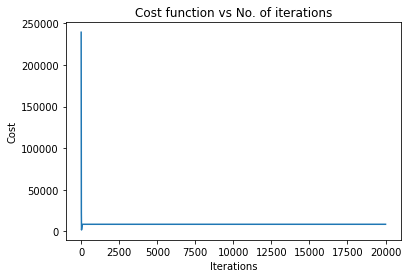

8518.940315583028


In [223]:
it = np.arange(t)
plt.plot(it, log)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost function vs No. of iterations')
plt.show()
print(log[np.max(it)])

Now that we've trained it, we shall obtain the predicted values and compare them with the actual values in order to find out how different they actually are. 

In [228]:
h2_test = np.dot(x2_test,w1.T)
J = (1/2*m)*np.sum(np.square(h2_test-y2_test))
print(J)

5626.821688860624


We now complete the analysis by computing the above results for more number of values of learning rate and regulariser. 

In [229]:
alpha = 0.01 # Learning rate
temp = np.zeros((x2_train.shape[1],1))
w1 = np.random.rand(1,x2_train.shape[1])
iterations = 0
t = 20000
lambda1 = 400
log = np.array([])
J = 0
while(iterations<t):
    h1 = np.dot(x2_train,w1.T)
    for i in range(x2_train.shape[1]):
        temp[i] = w1[:,i]*(1 - alpha*lambda1/m) - alpha*(1/m)*(np.sum((h1-y2_train)*x2_train[:,i:i+1], axis=0))
    for i in range(x2_train.shape[1]):
        w1[:,i] = temp[i]    
    J = (1/2*m)*np.sum(np.square(h1-y2_train))
    log = np.append(log, J)
    iterations+=1

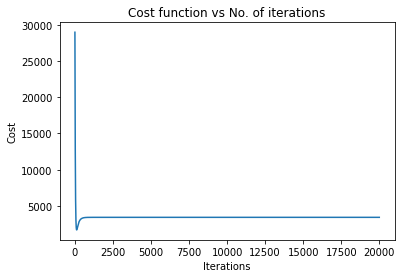

3437.4872652548056


In [230]:
it = np.arange(t)
plt.plot(it, log)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost function vs No. of iterations')
plt.show()
print(log[np.max(it)])

In [231]:
h2_test = np.dot(x2_test,w1.T)
J = (1/2*m)*np.sum(np.square(h2_test-y2_test))
print(J)

2200.5841353091137


#### CONCLUSION 

Clearly, we can observe that giving a training and testing split to our dataset gets us much closer to the ideal least squared value of the cost function. When we use a training-testing split, we ensure that we aren't considering all the data and hence allowing our model to learn in a better fashion. This highlights that we should always use a training and testing split while performing gradient descent algorithm. 